<a href="https://colab.research.google.com/github/cricci3/Salaries_clustering/blob/main/Project2_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
'''
Data Analytics
Assignment 2 - Group 2
Salaries (clustering)

Students: Pernille Bergesen (pernille.bergesen@usi.ch) and Claudio Ricci (riccicl@usi.ch)
'''

'\nData Analytics\nAssignment 2 - Group 2\nSalaries (clustering)\n\nStudents: Pernille Bergesen (pernille.bergesen@usi.ch) and Claudio Ricci (riccicl@usi.ch)\n'

In [40]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset

In [42]:
#loading the data from the san-francisco datasets
dataset_file_2011 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2011.csv'
dataset_file_2012 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2012.csv'
dataset_file_2013 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2013.csv'
dataset_file_2014 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2014.csv'

#just for testing:
#printing first two lines of 2011 dataset

df_2011 = pd.read_csv(dataset_file_2011)
df_2012 = pd.read_csv(dataset_file_2012)
df_2013 = pd.read_csv(dataset_file_2013)
df_2014 = pd.read_csv(dataset_file_2014)


print("san-francisco-2011.csv: ")
df_2011.head(2)

san-francisco-2011.csv: 


,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,Not Provided,567595.43,567595.43,2011,NaN,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011,NaN,San Francisco


In [43]:
#printing first two lines of 2012 dataset
print("san-francisco-2012.csv: ")
df_2012.head(2)

san-francisco-2012.csv: 


,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency
0,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,NaN,San Francisco
1,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,NaN,San Francisco


In [44]:
#printing first two lines of 2013 dataset
print("san-francisco-2013.csv: ")
df_2013.head(2)

san-francisco-2013.csv: 


,employee_name,job_title,base_pay,overtime_pay,other_pay,total_benefits,total_pay,total_pay_benefits,year,notes,jurisdiction_name
0,Gregory P Suhr,Chief of Police,319275.01,0.0,20007.06,86533.21,339282.07,425815.28,2013,NaN,San Francisco
1,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.0,23236.00,85431.39,336922.01,422353.40,2013,NaN,San Francisco


In [45]:
#printing first two lines of 2014 dataset
print("san-francisco-2014.csv: ")
df_2014.head(2)

san-francisco-2014.csv: 


,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
1,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT


# Data Manipulation

Exploration of datasets' columns

In [46]:
df_2011.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

In [47]:
df_2012.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

In [48]:
df_2013.columns

Index(['employee_name', 'job_title', 'base_pay', 'overtime_pay', 'other_pay',
       'total_benefits', 'total_pay', 'total_pay_benefits', 'year', 'notes',
       'jurisdiction_name'],
      dtype='object')

In [49]:
df_2014.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency', 'Status'],
      dtype='object')


- The 2011, 2012, and 2014 datasets contained identical columns: Employee Name, Job Title, Base Pay, Overtime Pay, Other Pay, Benefits, Total Pay, Total Pay & Benefits, Year, Notes, and Agency.

- The 2013 dataset had the same structure, with one exception: the Agency column was labeled Jurisdiction Name.

In [50]:
print(df_2011['Agency'].unique())
print(df_2012['Agency'].unique())
print(df_2013['jurisdiction_name'].unique())
print(df_2014['Agency'].unique())

['San Francisco']
['San Francisco']
['San Francisco']
['San Francisco']


The investigation showed that both columns contained the same single value, *San Francisco*, indicating they conveyed the same information. For convenience we rename this column as *Agency*.

In [51]:
# Rename juristiction_name into Agency
df_2013.rename(columns={'jurisdiction_name': 'Agency'}, inplace=True)

In [52]:
# others rename
df_2013.rename(columns={'employee_name' : 'Employee Name',
                        'job_title' : 'Job Title',
                        'base_pay' : 'Base Pay',
                        'overtime_pay' : 'Overtime Pay',
                        'other_pay' : 'Other Pay',
                        'total_benefits' : 'Benefits',
                        'total_pay' : 'Total Pay',
                        'total_pay_benefits' : 'Total Pay & Benefits',
                        'year' : 'Year',
                        'notes' : 'Notes'}, inplace=True)

Now, 2013 dataset present the same columns as the others

In [53]:
df_2013.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

2014 dataset is the only one giving an information about the status of a job, Full-time or Part-time. We decided to drop this column since no others datasets are giving it.

In [54]:
# Df_2014 has also status : Part-time / Full-time / nan
df_2014['Status'].unique()

array(['PT', 'FT', nan], dtype=object)

In [55]:
df_2014.drop(columns=['Status'], inplace=True)

In [56]:
df_2014.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

## Merge Datasets

The four datasets have the now the same columns, the only difference is df_2011 where benefits are not reported, we will set these to 0

In [57]:
df = pd.concat([df_2011, df_2012, df_2013, df_2014])

In [58]:
print(f"Shape of the dataset after merge: {df.shape}")

Shape of the dataset after merge: (148654, 11)


In [59]:
df.head(5)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011,NaN,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011,NaN,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011,NaN,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011,NaN,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011,NaN,San Francisco


In [60]:
df.drop(columns=['Agency'], inplace=True) # No information, just one classes

In [61]:
# Also remove Name (useless)
df.drop(columns=['Employee Name'], inplace=True)

In [62]:
print(f"Shape of the dataset after dropping 'Agency' and 'Employee Name' columns: {df.shape}")

Shape of the dataset after dropping 'Agency' and 'Employee Name' columns: (148654, 9)


## Manipulate NaNs

In [63]:
print(df['Base Pay'].unique())
print(df['Overtime Pay'].unique())
print(df['Other Pay'].unique())
print(df['Benefits'].unique())
print(df['Total Pay'].unique())
print(df['Total Pay & Benefits'].unique())

[167411.18 155966.02 212739.13 ... '6.04' '15.50' 'Not Provided']
[0.0 245131.88 106088.18 ... '102.70' '56.77' 'Not Provided']
[400184.25 137811.38 16452.6 ... '13.35' 'Not Provided' '-618.13']
['Not Provided' 44430.12 69810.19 ... '0.16' '0.13' '1.24']
[ 5.6759543e+05  5.3890928e+05  3.3527991e+05 ...  1.2890000e+01
  6.0000000e+00 -6.1813000e+02]
[ 5.6759543e+05  5.3890928e+05  3.3527991e+05 ...  1.2890000e+01
  7.2400000e+00 -6.1813000e+02]


In [64]:
# Replace 'Not Provided' (string) with real NaN
df.replace('Not Provided', np.nan, inplace=True)

In [65]:
print(f"Number of NaN values before manipulations: {df.isnull().sum()}")

Number of NaN values before manipulations: Job Title                    0
Base Pay                   609
Overtime Pay                 4
Other Pay                    4
Benefits                 36163
Total Pay                    0
Total Pay & Benefits         0
Year                         0
Notes                   148654
dtype: int64


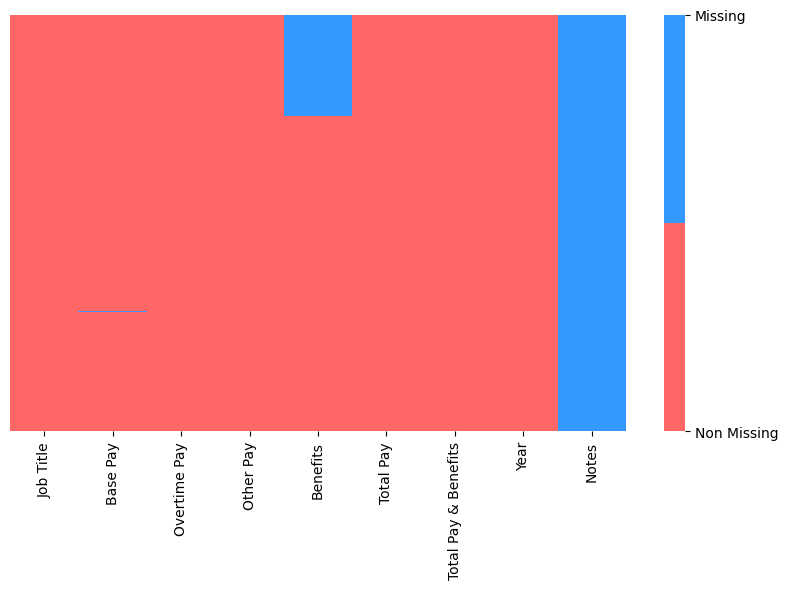

In [66]:
cmap = sns.color_palette(["#FF6666", "#3399FF"])

plt.figure(figsize=(8,6))

# Create heatmap
heatmap = sns.heatmap(df.isna(),
                      cbar=True,
                      cmap=cmap,
                      yticklabels=False)

plt.xticks(rotation=90)
plt.tight_layout()

colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Non Missing', 'Missing'])

plt.show()

The visualization highlights that the Notes column is entirely composed of missing values. Additionally, the Base Pay column contains a small number of missing entries (605 NaNs).

Based on this analysis, the following data cleaning steps were taken:

- Notes column was removed entirely, as it holds no usable information.

- Rows with missing Base Pay values were deleted, as this is a key feature for analysis.

- Missing values in the Benefits column were replaced with 0, under the assumption that unreported benefits can be treated as zero.

In [67]:
# Notes columns is full of null values -> drop
df.drop(columns=['Notes'], inplace=True)

In [68]:
# just some rows have NaN as null so we will drop just these
df.dropna(subset=['Base Pay'], inplace=True)
df.dropna(subset=['Overtime Pay'], inplace=True)
df.dropna(subset=['Other Pay'], inplace=True)

We need to manage NaN in 'Benefits' cause are a lot by substitute them with 0

In [69]:
df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce').fillna(0)

In [70]:
print(f"Number of NaN values after manipulations: {df.isnull().sum()}")

Number of NaN values after manipulations: Job Title               0
Base Pay                0
Overtime Pay            0
Other Pay               0
Benefits                0
Total Pay               0
Total Pay & Benefits    0
Year                    0
dtype: int64


## Refactor of Features

Lets manage the type of the columns, "pay columns" must be float

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148045 entries, 0 to 38122
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Job Title             148045 non-null  object 
 1   Base Pay              148045 non-null  object 
 2   Overtime Pay          148045 non-null  object 
 3   Other Pay             148045 non-null  object 
 4   Benefits              148045 non-null  float64
 5   Total Pay             148045 non-null  float64
 6   Total Pay & Benefits  148045 non-null  float64
 7   Year                  148045 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 10.2+ MB


In [72]:
# Convert different Pays to numeric, coercing non-numeric values to NaN
df['Overtime Pay'] = pd.to_numeric(df['Overtime Pay'], errors='coerce')
df['Other Pay'] = pd.to_numeric(df['Other Pay'], errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce')
df['Base Pay'] = pd.to_numeric(df['Base Pay'], errors='coerce')

In [73]:
# Check how many NaNs we have now
print(f"Number of NaN values after change in numeric: {df.isnull().sum()}")

Number of NaN values after change in numeric: Job Title               0
Base Pay                0
Overtime Pay            0
Other Pay               0
Benefits                0
Total Pay               0
Total Pay & Benefits    0
Year                    0
dtype: int64


The conversion in numeric does not create any NaNs

I want to check if
- 'Total Pay' is given from the sum of 'Base Pay' + 'Overtime Pay' + 'Other Pay'
- 'Total Pay & Benefits' is given by the sum of 'Total Pay' + 'Benefits'

In [74]:
import pandas as pd

# First check: Is 'Total Pay' the sum of 'Base Pay', 'Overtime Pay', and 'Other Pay'?
calculated_total_pay = df['Base Pay'] + df['Overtime Pay'] + df['Other Pay']
total_pay_matches = calculated_total_pay == df['Total Pay']

# Second check: Is 'Total Pay & Benefits' the sum of 'Total Pay' and 'Benefits'?
calculated_total_pay_benefits = df['Total Pay'] + df['Benefits']
total_pay_benefits_matches = calculated_total_pay_benefits == df['Total Pay & Benefits']

# Now, you can see how many rows match
print("Total Pay matches:", total_pay_matches.value_counts())
print("Total Pay & Benefits matches:", total_pay_benefits_matches.value_counts())

Total Pay matches: True     120934
False     27111
Name: count, dtype: int64
Total Pay & Benefits matches: True     124742
False     23303
Name: count, dtype: int64


It seems that not always the 'Total Pay' and 'Total Pay & Benefits' are given by the sum of other columns but let check better by looking at some rows where this is not the case

In [75]:
mismatch_total_pay = df[~total_pay_matches]
mismatch_total_pay_benefits = df[~total_pay_benefits_matches]

# See a few examples where Total Pay doesn't match
print(mismatch_total_pay[['Base Pay', 'Overtime Pay', 'Other Pay', 'Total Pay']].head(10))

print()

# See a few examples where Total Pay & Benefits doesn't match
print(mismatch_total_pay_benefits[['Total Pay', 'Benefits', 'Total Pay & Benefits']].head(10))

     Base Pay  Overtime Pay  Other Pay  Total Pay
0   167411.18          0.00  400184.25  567595.43
7   256576.96          0.00   51322.50  307899.46
10  194999.39      71344.88   33149.90  299494.17
13  271329.03          0.00   21342.59  292671.62
15  198778.01      73478.20   13957.65  286213.86
24  140546.86      97868.77   31909.28  270324.91
30  234325.02          0.00   25972.64  260297.66
31  254027.63          0.00    5899.48  259927.11
35  101953.20     139102.95   16483.94  257540.09
44  196081.86          0.00   54040.18  250122.04

    Total Pay  Benefits  Total Pay & Benefits
0   362844.66  44430.12             407274.78
2   336393.73  53102.29             389496.02
8   350403.41  24287.23             374690.64
10  321883.83  49648.09             371531.92
12  316988.26  52320.90             369309.16
16  284323.16  73017.12             357340.28
17  288538.97  64702.72             353241.69
19  279330.73  72286.35             351617.08
20  294212.55  56202.98            

When examining the first two rows, Python initially indicated that:

- 'Total Pay' does not match the sum of 'Base Pay', 'Overtime Pay', and 'Other Pay'.

- 'Total Pay & Benefits' does not match the sum of 'Total Pay' and 'Benefits'.

However, after manually calculating the sums:

- In the first row, 167411.18 + 0.00 + 400184.25 = 567595.43, which matches 'Total Pay' exactly.

- Similarly, 362844.66 + 44430.12 = 407274.78, which matches 'Total Pay & Benefits' exactly.

This suggests that any mismatch detected by Python is likely due to minor floating-point rounding errors, not real discrepancies.

Therefore, I conclude that:

- 'Total Pay' is indeed the sum of 'Base Pay', 'Overtime Pay', and 'Other Pay'.

- 'Total Pay & Benefits' is the sum of 'Total Pay' and 'Benefits'.

Since these columns can be reliably recreated from the others, I will drop them to avoid redundant columns.

In [76]:
df.drop(columns=['Total Pay', 'Total Pay & Benefits'], inplace=True)

## Manage negative values

In [77]:
print(f"Shape of the dataset: {df.shape}")
print("\nFirst few rows:")
df.head()

Shape of the dataset: (148045, 6)

First few rows:


,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,2011


In [78]:
print("Data types:")
df.dtypes

Data types:


,0
Job Title,object
Base Pay,float64
Overtime Pay,float64
Other Pay,float64
Benefits,float64
Year,int64


In [79]:
print("Descriptive statistics:")
df.describe()

Descriptive statistics:


,Base Pay,Overtime Pay,Other Pay,Benefits,Year
count,148045.000000,148045.000000,148045.000000,148045.000000,148045.000000
mean,66325.448840,5086.740800,3645.661408,18980.334019,2012.520653
std,42764.635495,11473.181557,8019.498636,17176.391332,1.119390
min,-166.010000,-0.010000,-7058.590000,-13.800000,2011.000000
25%,33588.200000,0.000000,0.000000,0.000000,2012.000000
50%,65007.450000,0.000000,817.170000,23468.340000,2013.000000
75%,94691.050000,4695.710000,4242.900000,33507.310000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,2014.000000


From here we can see that there are some rows that have negative value for 'Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits'. These values are not plausible in the context of employee compensation and likely represent data entry errors or anomalies.


In [80]:
cols = ['Base Pay',	'Overtime Pay',	'Other Pay',	'Benefits']
# For each column, count how many rows have a negative value
for col in cols:
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {negative_count} rows with negative values")

Base Pay: 11 rows with negative values
Overtime Pay: 1 rows with negative values
Other Pay: 5 rows with negative values
Benefits: 1 rows with negative values


In total, 18 rows were identified with negative values in at least one of these columns. To ensure data quality and maintain consistency in our analysis, we removed these rows from the dataset.

In [81]:
# Find rows where any of the pay columns have a negative value
rows_with_negatives = (df[cols] < 0).any(axis=1)

# Drop those rows
df = df[~rows_with_negatives].reset_index(drop=True)

print(f"New shape after dropping rows with negative pay: {df.shape}")


New shape after dropping rows with negative pay: (148027, 6)


## Duplicate Rows

In [82]:
# Count duplicate rows
print(f"Number of rows before removing duplicates: {df.shape[0]}")
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows (keep only the first occurrence)
df = df.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows before removing duplicates: 148027
Number of duplicate rows: 4592
Number of rows after removing duplicates: 143435


# Data Analysis

## Descriptive Statistics

In [ ]:
print(f"At the end of the data manipulation part, the dataset has shape: {df.shape}")

In [83]:
df.describe()

,Base Pay,Overtime Pay,Other Pay,Benefits,Year
count,143435.000000,143435.000000,143435.000000,143435.000000,143435.000000
mean,66246.859304,5248.519343,3753.472049,19139.891295,2012.523094
std,42517.998179,11619.853834,8121.140181,17155.836524,1.113891
min,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,34007.400000,0.000000,0.000000,0.445000,2012.000000
50%,64871.970000,0.000000,894.980000,23855.140000,2013.000000
75%,94296.630000,4993.175000,4429.770000,33567.930000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,2014.000000


## Distribution of Values

In [84]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns: {numeric_columns}")

Numeric columns: ['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Year']


In [85]:
# Function to plot histograms with density curve and vertical lines for mean, median and outlier bounds
def plot_distribution(column, df, bins=30):
    plt.figure(figsize=(12, 6))

    # Identify potential outliers using IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot histogram and density for all data (including outliers)
    sns.histplot(df[column], kde=True, bins=bins)

    # Add median lines
    plt.axvline(df[column].median(), color='g', linestyle='-.', label=f'Median: {df[column].median():.2f}')

    # Add outlier threshold lines
    plt.axvline(lower_bound, color='orange', linestyle=':', label=f'Lower outlier threshold: {lower_bound:.2f}')
    plt.axvline(upper_bound, color='orange', linestyle=':', label=f'Upper outlier threshold: {upper_bound:.2f}')

    # Add title and labels
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    plt.show()

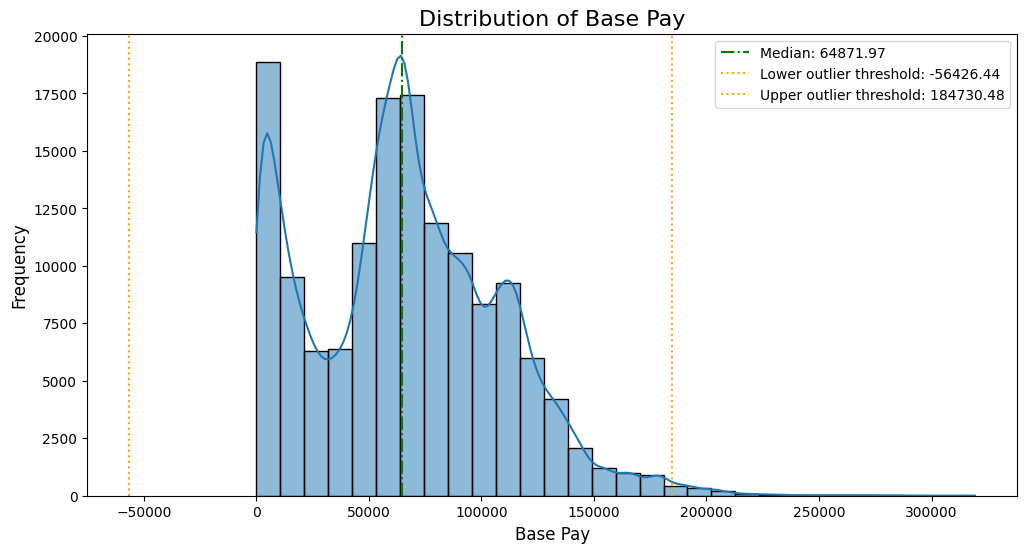

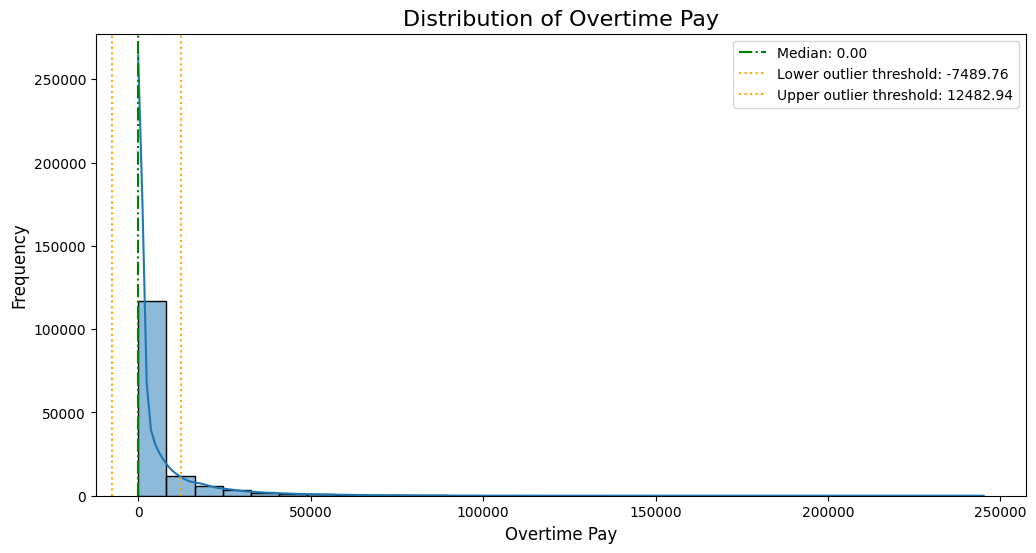

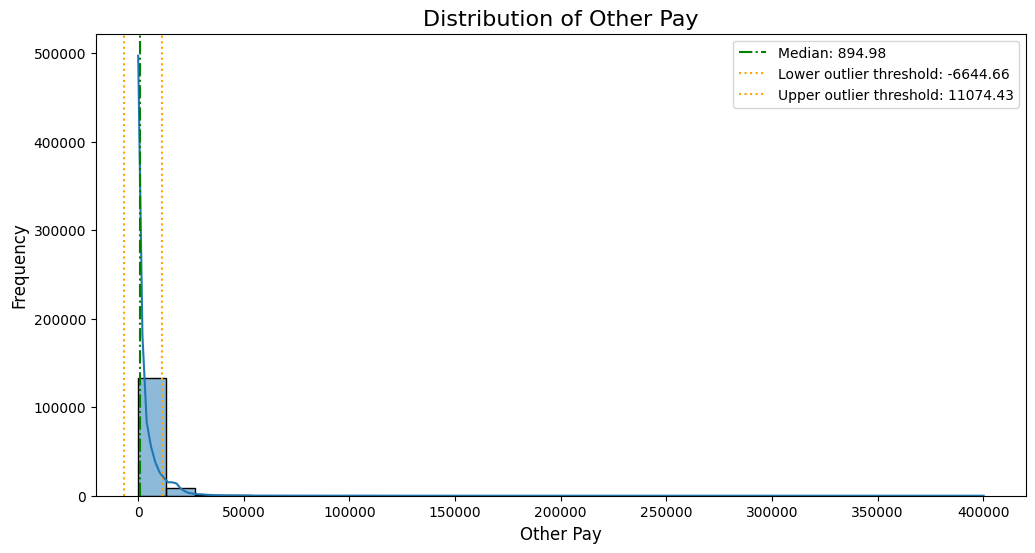

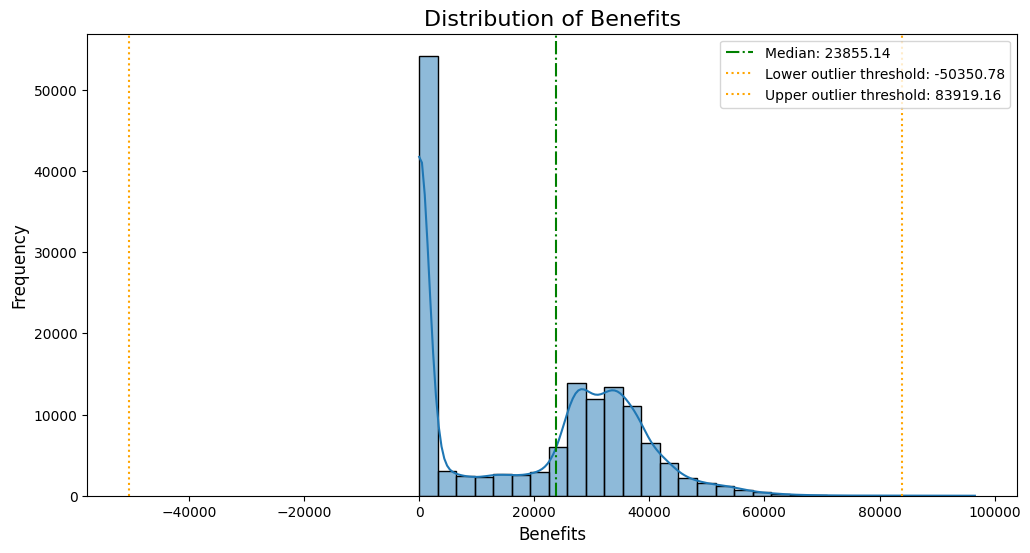

In [86]:
# Plot distributions for each numeric column (limit to relevant ones)
pay_columns = [col for col in numeric_columns if 'Pay' in col or 'Benefits' in col]
for column in pay_columns:
    plot_distribution(column, df)

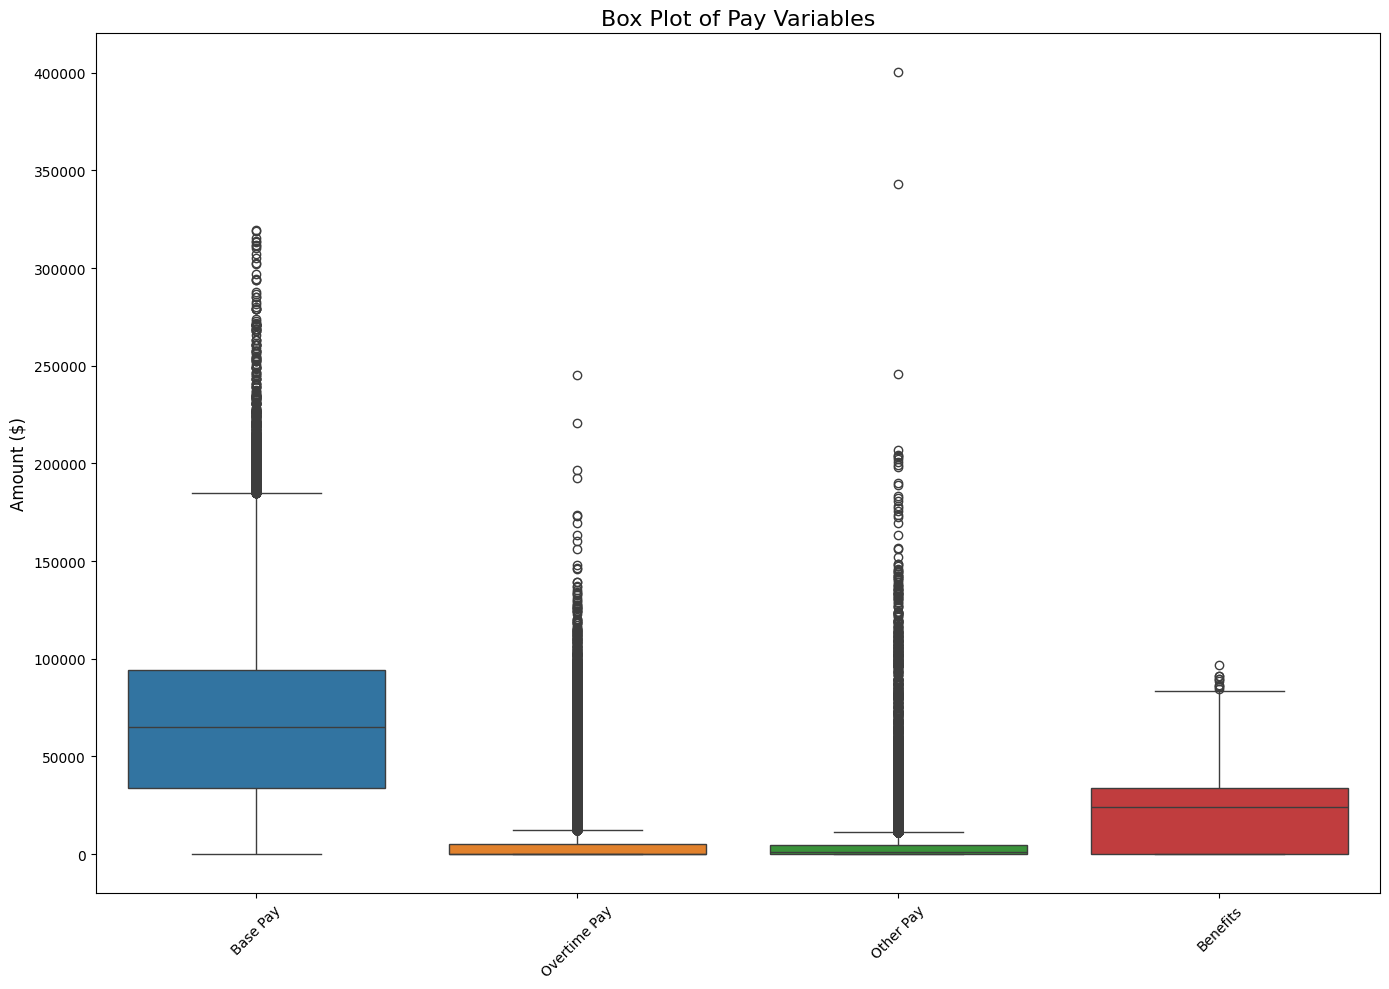

In [87]:
# Create box plots for pay-related columns to visualize outliers
plt.figure(figsize=(14, 10))
sns.boxplot(data=df[pay_columns])
plt.title('Box Plot of Pay Variables', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Amount ($)', fontsize=12)
plt.tight_layout()
plt.show()

The salary and pay-related columns exhibit a long right tail, which is expected due to the presence of a small number of individuals earning exceptionally high compensation. Since these high salaries are real and meaningful data points, I will not treat them as outliers. No substitution, capping, or removal will be performed for these values.

## Feature Correlation

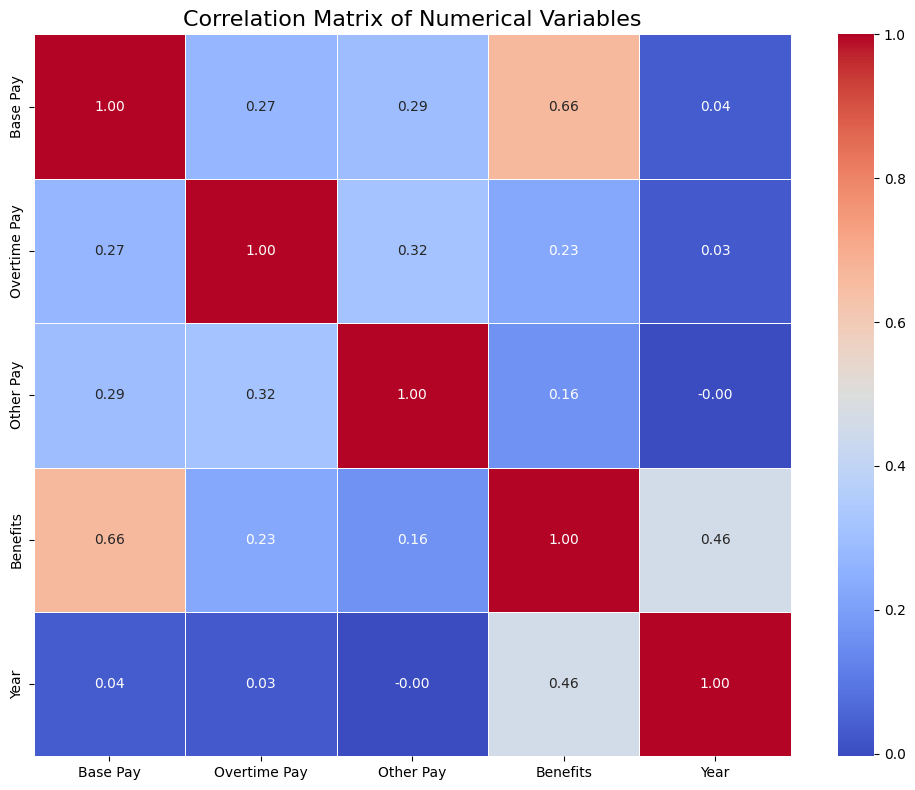

In [88]:
# Calculate correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

## Some information about the Jobs

Total unique job titles: 2154

Top 10 most common job titles:
Job Title
Transit Operator                6871
Special Nurse                   4379
Registered Nurse                3716
Police Officer 3                2404
Public Svc Aide-Public Works    2385
Custodian                       2355
TRANSIT OPERATOR                2315
Firefighter                     2291
Recreation Leader               1961
Patient Care Assistant          1919
Name: count, dtype: int64


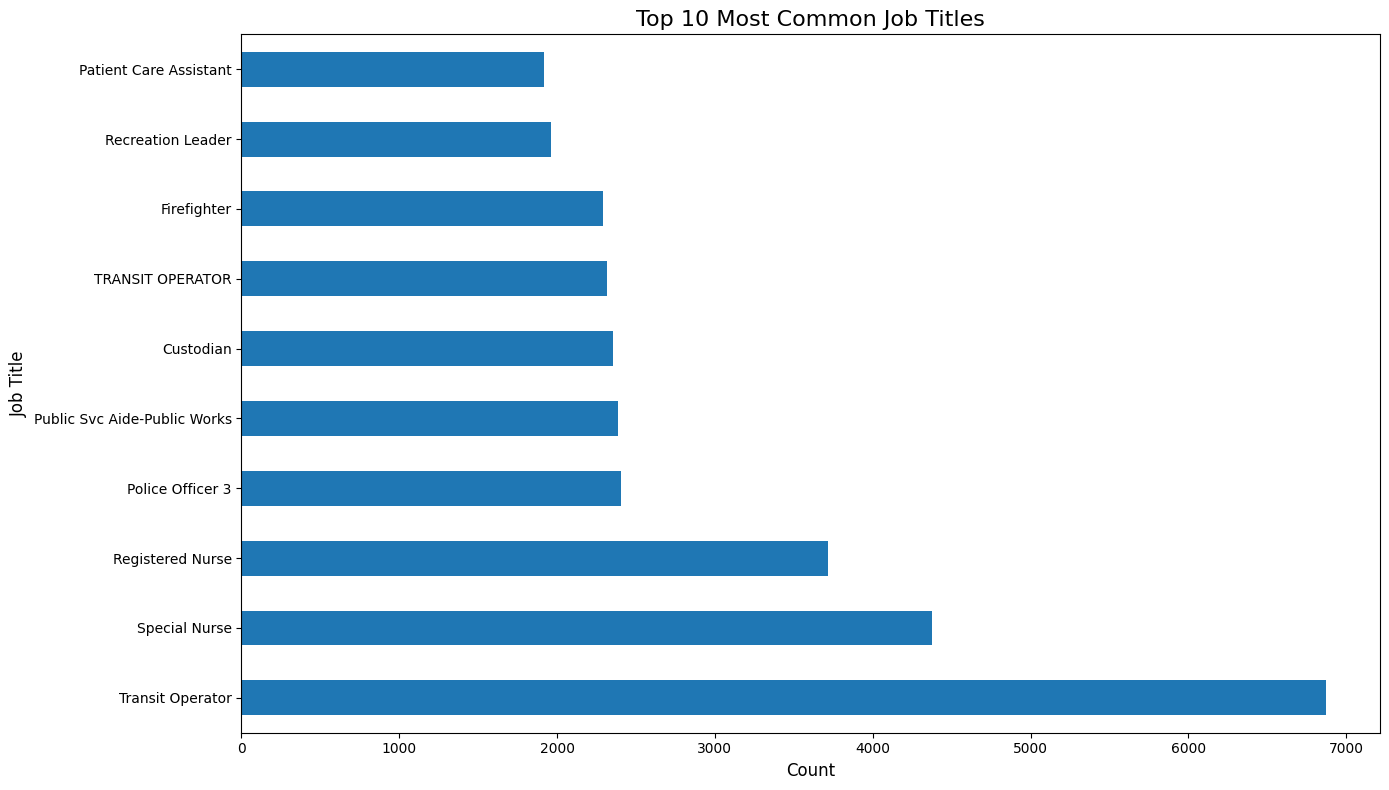

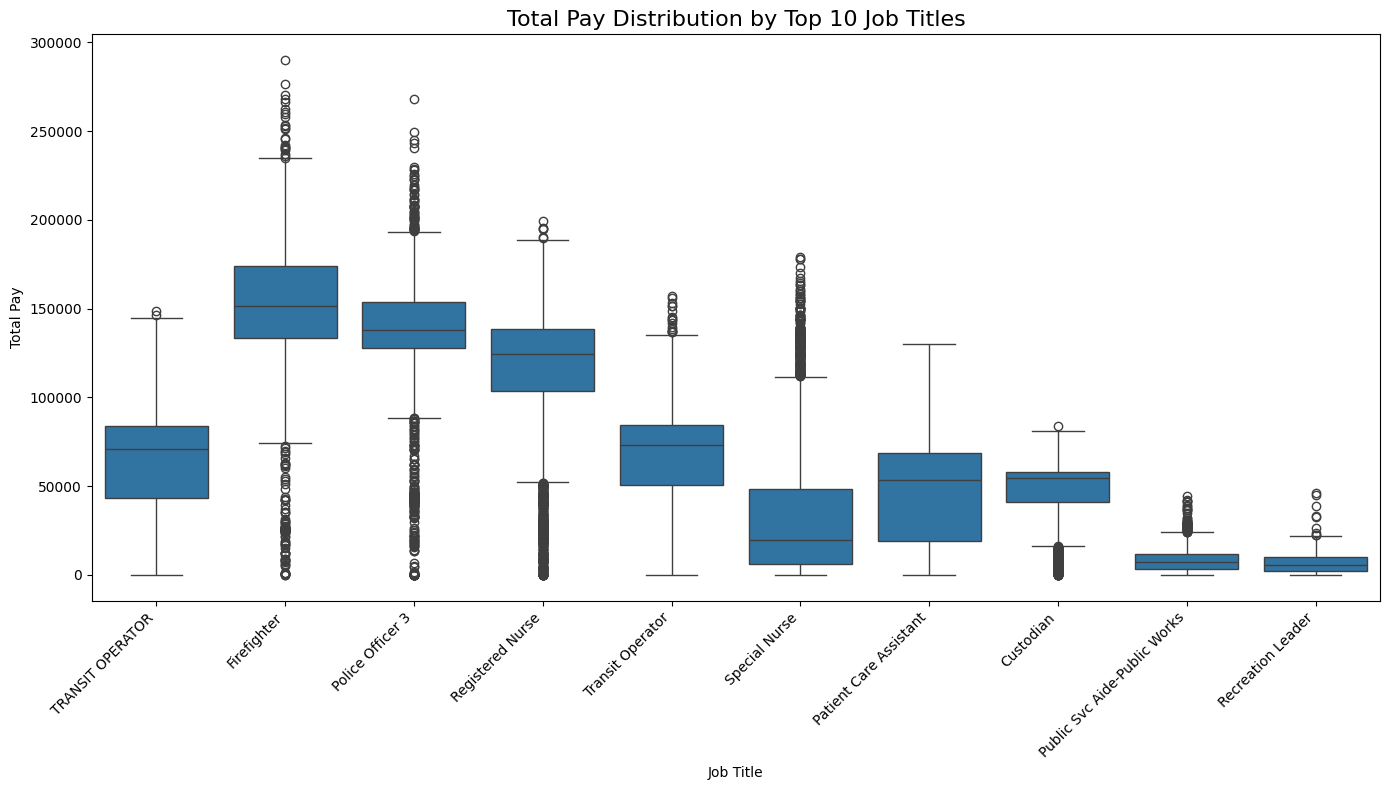

In [89]:
df['Total Pay'] = df['Base Pay'] + df['Other Pay'] + df['Overtime Pay']

# Count the frequency of job titles
job_counts = df['Job Title'].value_counts()
print(f"Total unique job titles: {len(job_counts)}")
print("\nTop 10 most common job titles:")
print(job_counts.head(10))

# Plot the top 10 job titles
plt.figure(figsize=(14, 8))
job_counts.head(10).plot(kind='barh')
plt.title('Top 10 Most Common Job Titles', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.tight_layout()
plt.show()

# Analyze pay by job title (top 10 jobs)
top_jobs = job_counts.head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(x='Job Title', y='Total Pay', data=df[df['Job Title'].isin(top_jobs)])
plt.title('Total Pay Distribution by Top 10 Job Titles', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

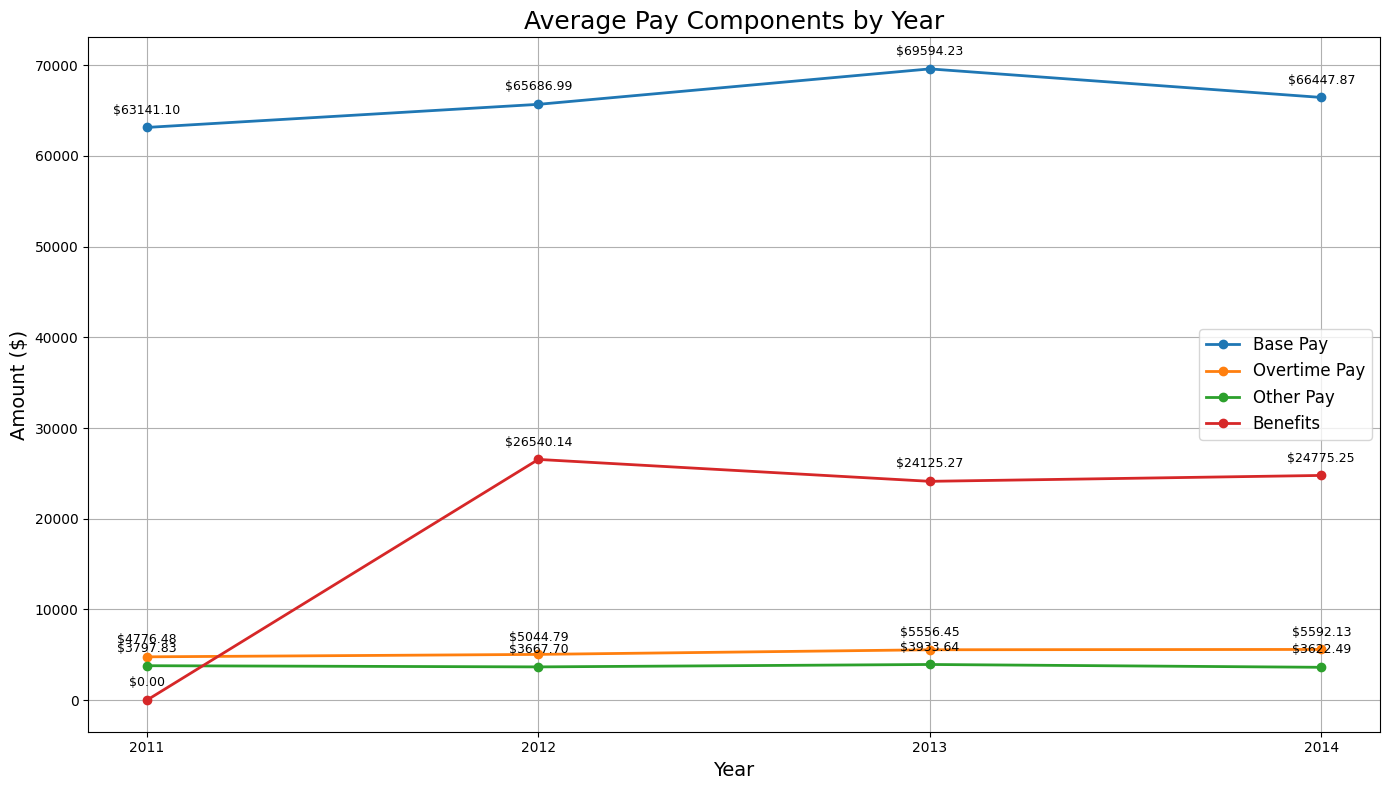

In [90]:
plt.figure(figsize=(14, 8))

# Calculate average pay metrics by year
yearly_averages = df.groupby('Year')[cols].mean().reset_index()

# Create a multi-line plot
for column in cols:
    plt.plot(yearly_averages['Year'], yearly_averages[column], marker='o', linewidth=2, label=column)

plt.title('Average Pay Components by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount ($)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(yearly_averages['Year'].unique())  # Ensure all years are shown
plt.tight_layout()

# Add value labels to each point
for column in cols:
    for i, year in enumerate(yearly_averages['Year']):
        value = yearly_averages.loc[yearly_averages['Year'] == year, column].values[0]
        plt.annotate(f"${value:.2f}",
                    (year, value),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=9)

plt.show()

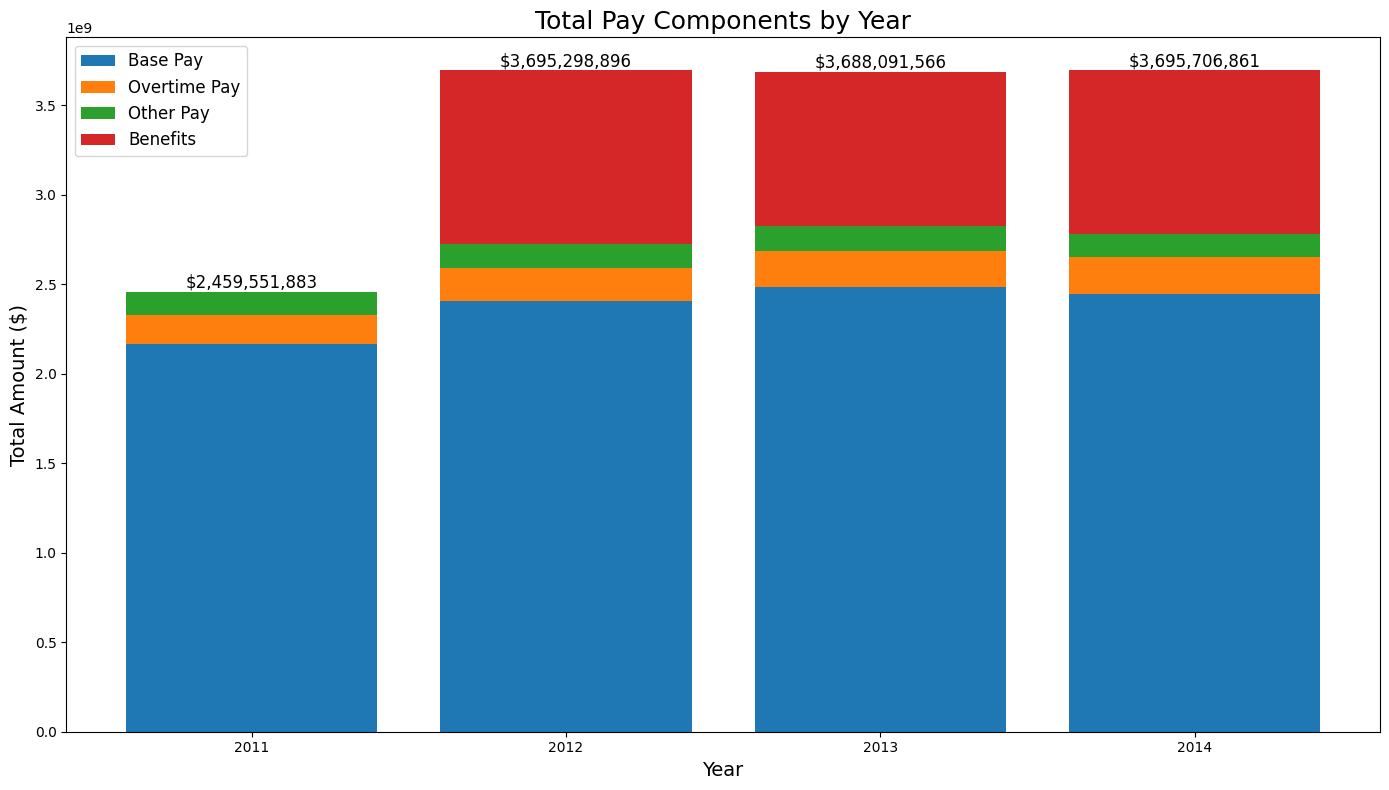

In [91]:
plt.figure(figsize=(14, 8))

# Calculate sum of each pay component by year
yearly_sums = df.groupby('Year')[cols].sum().reset_index()

# Create the stacked bar chart
bottom = np.zeros(len(yearly_sums))

for component in cols:
    plt.bar(yearly_sums['Year'], yearly_sums[component], bottom=bottom, label=component)
    bottom += yearly_sums[component]

plt.title('Total Pay Components by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Amount ($)', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(yearly_sums['Year'].unique())  # Ensure all years are shown

# Add total labels on top of each bar
for i, year in enumerate(yearly_sums['Year']):
    total = sum(yearly_sums.loc[yearly_sums['Year'] == year, cols].values[0])
    plt.text(year, total, f'${total:,.0f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [92]:
# Calculate percentage breakdown of pay components by year
yearly_percentages = yearly_sums.copy()
for component in cols:
    yearly_percentages[component + ' %'] = yearly_sums[component] / yearly_sums[cols].sum(axis=1) * 100

print("Percentage Breakdown of Pay Components:")
percentage_cols = ['Year'] + [component + ' %' for component in cols]
print(yearly_percentages[percentage_cols].to_string(index=False, float_format=lambda x: f"{x:.2f}%"))

Percentage Breakdown of Pay Components:
 Year  Base Pay %  Overtime Pay %  Other Pay %  Benefits %
 2011      88.04%           6.66%        5.30%       0.00%
 2012      65.08%           5.00%        3.63%      26.29%
 2013      67.43%           5.38%        3.81%      23.38%
 2014      66.16%           5.57%        3.61%      24.67%


To identify the pair of columns on which doing the clustering, we are going to plot all the pairs


Creating scatter plot matrix to visualize potential clusters...


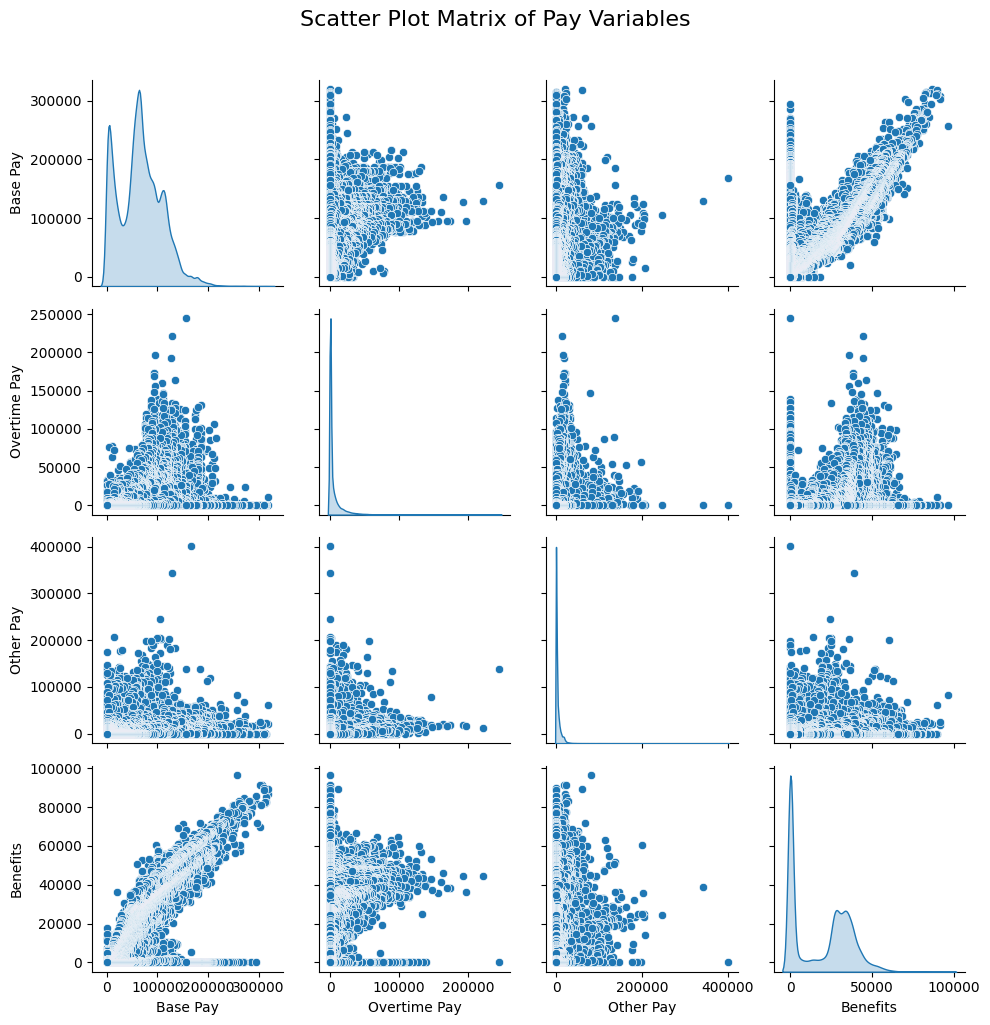

In [93]:
# Scatter plot matrix to visualize potential clusters
print("\nCreating scatter plot matrix to visualize potential clusters...")
# Select a subset of pay columns for the scatter matrix to avoid overcrowding
scatter_columns = cols
sns.pairplot(df[scatter_columns], diag_kind='kde', height=2.5)
plt.suptitle('Scatter Plot Matrix of Pay Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

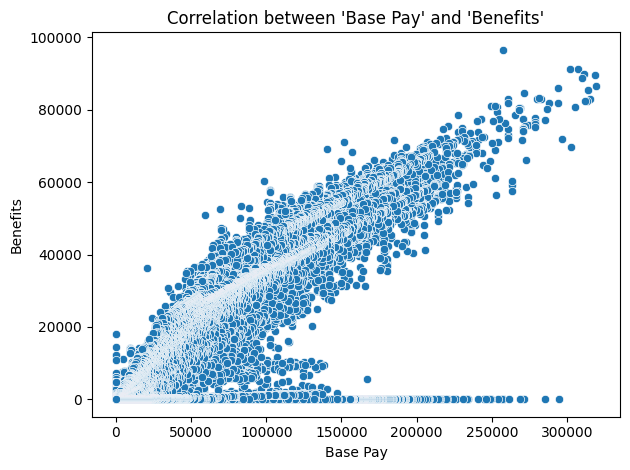

In [95]:
sns.scatterplot(data=df, x="Base Pay", y="Benefits")
plt.title("Correlation between 'Base Pay' and 'Benefits'")
plt.tight_layout()
plt.show()

# Clustering

We chose to cluster for the jobs based on salaries and benefits.


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [97]:
seed = 0
np.random.seed(seed)

In [98]:
#selecting the columns relevant for the jobs based on their various attributes such as Base Pay, Overtime Pay, Other Pay, Benefits, Total Pay, Total Pay & Benefits
#column_features = ['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits']
jobs = df[cols].copy()
scaler = StandardScaler()
jobs_scaled = scaler.fit_transform(jobs)

In [ ]:
#finding the best k to use for the k-means algorithm
scores = []
#testing between 2-15
K_range = range(2, 16)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=seed)
    labels = kmeans.fit_predict(jobs_scaled)
    score = silhouette_score(jobs_scaled, labels)
    scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(K_range, scores, marker='o')
plt.title("Scores for different k values in K-Means")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score based on silhouette ")
plt.grid(True)
plt.show()

Silhouette Score for k=2: 0.3669


### 1.1 K-Means clustering

In [ ]:
optimal_k = K_range[np.argmax(scores)]
print(f"Optimal k is: {optimal_k}")

#K-Means algorithm clustering for columns ('Base Pay', 'Overtime Pay', 'Other Pay')
#7 as the cluster number based on results from the silhouette scoring showed the optimal k is 7
kmeans = KMeans(n_clusters=optimal_k, random_state=seed)
cluster_jobs = kmeans.fit_predict(jobs_scaled)
df['clustering_kmeans'] = cluster_jobs

kmeans.cluster_centers_

In [ ]:
#for plotting in 2D, choosing just two of the columns to determine what are different categories of jobs based on salaries and benefits?
df['Total Pay & Benefits'] = df['Total Pay'] + df['Benefits']

x_axis = 'Total Pay'
#x_axis = 'Base Pay'
y_axis = 'Benefits'

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before K-Means clustering
ax[0].scatter(df[x_axis], df[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before K-Means clustering")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after K-Means clustering for jobs
ax[1].scatter(df[x_axis], df[y_axis], c=df['clustering_kmeans'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After K-Means clustering of jobs")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

In [ ]:
#showing the 10 most frequent Benefit values and how often they appear to better understand the graphs above
df['Benefits'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
df['clustering_kmeans'] = cluster_jobs

#finding the 7 most common job titles that appear to be grouped together within each cluster
most_job_title = (
    df.groupby('clustering_kmeans')['Job Title']
    .value_counts()
    .groupby(level=0)
    .head(7)
    .reset_index(name='Count')
)

#printing as a table
print(most_job_title.to_markdown(index=False))

In [ ]:
print(df.shape)

Code for limited number of rows (30000)

In [ ]:
#only taking 30000 rows from the dataset to limit the RAM usage
df_limited = df.sample(n=30000, random_state=seed)

df_limited['Total Pay'] = df_limited['Base Pay'] + df_limited['Overtime Pay'] + df_limited['Other Pay']
df_limited['Total Pay & Benefits'] = df_limited['Total Pay'] + df_limited['Benefits']

#jobs_limited = df_limited[['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits']]
jobs_limited = df_limited[['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits']]
scaler_limited = StandardScaler()
jobs_scaled_limited = scaler.fit_transform(jobs_limited)

### 1.2 K-Means clustering for limited rows

Due to the spectral clustering running so very slowly and the Hierarchical with agglomerative clustering uses to much RAM, we had to use the algorithms with a limited number of rows to be able to compare the algorithm methods fairly.

In [ ]:
#K-Means for limited amount of rows
#7 as the cluster number based on results from the silhouette scoring showed the optimal k is 7
kmeans_limited = KMeans(7, random_state=seed)
df_limited['kmeans_limited'] = kmeans_limited.fit_predict(jobs_scaled_limited)

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before K-Means clustering
ax[0].scatter(df_limited[x_axis], df_limited[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before K-Means clustering for limited rows")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after K-Means clustering for jobs
ax[1].scatter(df_limited[x_axis], df_limited[y_axis], c=df_limited['kmeans_limited'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After K-Means clustering of jobs for limited rows")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

In [ ]:
#finding the 7 most common job titles that appear to be grouped together within k-means clustering for limited rows
most_job_title_kmeans_limited = (
    df_limited.groupby('clustering_kmeans_limited')['Job Title']
    .value_counts()
    .groupby(level=0)
    .head(7)
    .reset_index(name='Count')
)

#printing as a table
print(most_job_title_kmeans_limited.to_markdown(index=False))

In [ ]:
#finding which cluster has the highest average of Total Pay and Benefits
#highest average of Total Pay of limited k-means method
print("Average Total Pay per cluster for limited k-means:")
print(df.groupby('clustering_kmeans_limited')['Total Pay'].mean().sort_values(ascending=False))

#highest average of Benefits of limited k-means methods
print("Average Benefits per cluster for limited k-means:")
print(df.groupby('clustering_kmeans_limited')['Benefits'].mean().sort_values(ascending=False))

### 2.1 Spectral clustering for limited rows

In [ ]:
#Spectral clustering for limited rows (5000)
#7 as the cluster number based on results from the silhouette scoring showed the optimal k is 7
cluster_jobs_spectral_limited = SpectralClustering(7, affinity='nearest_neighbors', random_state=seed)
df_limited['cluster_jobs_spectral_limited'] = cluster_jobs_spectral_limited.fit_predict(jobs_scaled_limited)

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before Spectral clustering
ax[0].scatter(df_limited[x_axis], df_limited[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before Spectral clustering for limited rows")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after Spectral clustering for jobs
ax[1].scatter(df_limited[x_axis], df_limited[y_axis], c=df_limited['cluster_jobs_spectral_limited'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After Spectral clustering of jobs for limited rows")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

In [ ]:
#finding the 7 most common job titles that appear to be grouped together within spectral clustering for limited rows
most_job_title_spectral_limited = (
    df_limited.groupby('clustering_spectral_limited')['Job Title']
    .value_counts()
    .groupby(level=0)
    .head(7)
    .reset_index(name='Count')
)

#printing as a table
print(most_job_title_spectral_limited.to_markdown(index=False))

In [ ]:
#finding which cluster has the highest average of Total Pay and Benefits
#highest average of Total Pay of limited spectral method
print("Average Total Pay per cluster for limited spectral:")
print(df.groupby('clustering_spectral_limited')['Total Pay'].mean().sort_values(ascending=False))

#highest average of Benefits of limited spectral methods
print("Average Benefits per cluster for limited spectral:")
print(df.groupby('clustering_spectral_limited')['Benefits'].mean().sort_values(ascending=False))

### 3.1 Hierarchical with agglomerative clustering for limited rows





In [ ]:
#Hierarchical with agglomerative clustering for limited rows (5000)
#7 as the cluster number based on results from the silhouette scoring showed the optimal k is 7
cluster_jobs_agglomerative_limited = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
df_limited['clustering_agglomerative_limited'] = cluster_jobs_agglomerative_limited.fit_predict(jobs_scaled_limited)

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before Agglomerative clustering
ax[0].scatter(df_limited[x_axis], df_limited[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before Agglomerative clustering for limited rows")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after Agglomerative clustering for jobs
ax[1].scatter(df_limited[x_axis], df_limited[y_axis], c=df_limited['clustering_agglomerative_limited'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After Agglomerative clustering of jobs for limited rows")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

In [ ]:
#finding the 7 most common job titles that appear to be grouped together within agglomerative clustering for limited rows
most_job_title_agglomerative_limited = (
    df_limited.groupby('clustering_agglomerative_limited')['Job Title']
    .value_counts()
    .groupby(level=0)
    .head(7)
    .reset_index(name='Count')
)

#printing as a table
print(most_job_title_agglomerative_limited.to_markdown(index=False))

### Model evaluations

In [ ]:
#finding which cluster has the highest average of Total Pay and Benefits
#highest average of Total Pay of limited agglomerative method
print("Average Total Pay per cluster for limited agglomerative:")
print(df.groupby('clustering_agglomerative_limited')['Total Pay'].mean().sort_values(ascending=False))

#highest average of Benefits of limited agglomerative methods
print("Average Benefits per cluster for limited agglomerative:")
print(df.groupby('clustering_agglomerative_limited')['Benefits'].mean().sort_values(ascending=False))

In [ ]:
#Model evaluation based on clustering performance by the silhouette scores
print("Model/Clustering evaluation based scores by silhouette :")
#k-means limited model
print("KMeans silhouette scores:", silhouette_score(jobs_scaled_limited, df_limited['kmeans_limited']))
#spectral limited model
print("Spectral silhouette scores:", silhouette_score(jobs_scaled_limited, df_limited['cluster_jobs_spectral_limited']))
#agglomerative limited model
print("Agglomerative silhouette scores:", silhouette_score(jobs_scaled_limited, df_limited['clustering_agglomerative_limited']))

### 2.2 Spectral clustering

In [ ]:
#Spectral clustering for 6 columns ('Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits')
#7 as the cluster number based on results from the silhouette scoring showed the optimal k is 7
cluster_jobs_spectral = SpectralClustering(7, affinity='nearest_neighbors', random_state=seed).fit_predict(jobs_scaled)
df['clustering_spectral'] = cluster_jobs_spectral

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before Spectral clustering
ax[0].scatter(df[x_axis], df[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before Spectral clustering")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after Spectral clustering for jobs
ax[1].scatter(df[x_axis], df[y_axis], c=df['clustering_spectral'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After Spectral clustering of jobs")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

#The spectral clustering method keeps running for a very long time in difference to K-Means clustering

In [ ]:
#finding the 7 most common job titles that appear to be grouped together within spectral cluster
most_job_title_spectral = (
    df.groupby('clustering_spectral')['Job Title']
    .value_counts()
    .groupby(level=0)
    .head(7)
    .reset_index(name='Count')
)

#printing as a table
print(most_job_title_spectral.to_markdown(index=False))

### 3.2 Hierarchical with agglomerative clustering

In [ ]:
# #Hierarchical with agglomerative clustering for 6 columns ('Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits')
# #7 as the cluster number based on results from the silhouette scoring showed the optimal k is 7
# cluster_jobs_agglomerative = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward').fit_predict(jobs_scaled)
# df['clustering_agglomerative'] = cluster_jobs_agglomerative

# #creating plots next to each other to similarise the before and after clustering
# fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

# #the left plot shows data before Agglomerative clustering
# ax[0].scatter(df[x_axis], df[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
# ax[0].set_title("Before Agglomerative clustering")
# ax[0].set_xlabel(x_axis)
# ax[0].set_ylabel(y_axis)

# #the right plot shows data after Agglomerative clustering for jobs
# ax[1].scatter(df[x_axis], df[y_axis], c=df['clustering_agglomerative'], cmap='tab10', s=35, alpha=0.5)
# ax[1].set_title("After Agglomerative clustering of jobs")
# ax[1].set_xlabel(x_axis)
# ax[1].set_ylabel(y_axis)

# plt.tight_layout()
# plt.show()

# #The Agglomerative clustering kept using too much RAM so it gave errors

In [ ]:
# #finding the 7 most common job titles that appear to be grouped together within agglomerative cluster
# most_job_title_agglomerative = (
#     df.groupby('clustering_agglomerative')['Job Title']
#     .value_counts()
#     .groupby(level=0)
#     .head(7)
#     .reset_index(name='Count')
# )

# #printing as a table
# print(most_job_title_agglomerative.to_markdown(index=False))